In [52]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=0b13b2be84bec9a882dd171c5b44ae364f988601170b0b370b5fd98743e669f6
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-win_amd64.whl size=33699 sha256=fc0bead50845117c0929276a50ef0e583363427ae658cef1ccf6525f3cd3ba29
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


In [1]:
!pip uninstall tensorflow

^C


In [2]:
!pip install tensorflow-gpu

In [3]:
print("hi")

hi


In [4]:
import numpy as np
import pandas as pd
import os
import skimage
import skimage.io as io
from skimage.transform import rescale, resize
from collections import namedtuple
from collections import Counter
import tensorflow as tf

pd.options.display.max_seq_items = None

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\data\covid\metadata.csv")

data.head(2)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN


In [5]:
data.finding.unique()

array(['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS',
       'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Bacterial/Streptococcus', 'No Finding',
       'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli',
       'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella',
       'Unknown', 'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Viral/Influenza', 'todo', 'Tuberculosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'], dtype=object)

In [6]:
dict_file_finding = {}
for file, finding in data[["filename", "finding"]].values:
    dict_file_finding[os.path.join(r"C:\Users\Lenovo\OneDrive\data\covid\images\images", file)] = "COVID" in finding

In [7]:
list(dict_file_finding.items())[0]

('C:\\Users\\Lenovo\\OneDrive\\data\\covid\\images\\images\\auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 True)

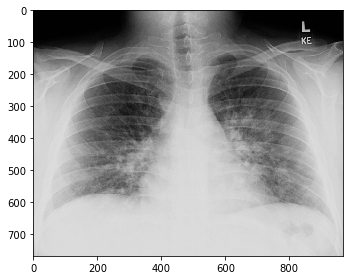

In [8]:
for root, folders, files in os.walk(r"C:\Users\Lenovo\OneDrive\data\covid\images\images"):
    for file in files:
        io.imshow(os.path.join(root,file))
        break

In [9]:
ImageFinding = namedtuple("ImgFind", ["image", "finding"])

In [10]:
list_image_finding = []
for image,finding in dict_file_finding.items():
    try:
        list_image_finding.append(ImageFinding(io.imread(image), finding))
    except Exception as e:
        print(e)

No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\radiopaedia_org_covid-19-pneumonia-7_85703_0-dcm.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\radiopaedia_org_covid-19-pneumonia-14_85914_0-dcm.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\coronacases_org_001.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\coronacases_org_002.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\coronacases_org_003.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\coronacases_org_004.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\coronacases_org_005.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\coronacases_org_006.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\coronacases_org_007.nii.gz'
No such file: 'C:\Users\Lenovo\OneDrive\data\covid\images\images\coronacases_org_008.nii.gz'
No such fil

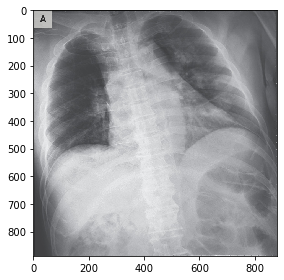

In [11]:
io.imshow(list_image_finding[0].image)

In [12]:
list(i.finding for i in list_image_finding).count(True), list(i.finding for i in list_image_finding).count(False)

(552, 357)

In [13]:
Counter(i.image.shape for i in list_image_finding)

Counter({(888, 882, 3): 1,
         (891, 880, 3): 1,
         (876, 882, 3): 1,
         (874, 880, 3): 1,
         (1272, 1645, 3): 1,
         (1308, 1652, 3): 1,
         (631, 790, 3): 1,
         (1402, 1401, 3): 1,
         (1412, 1404, 3): 1,
         (1474, 1692): 1,
         (1546, 1800): 2,
         (1800, 1772): 1,
         (1710, 1708): 1,
         (1593, 1800): 1,
         (1508, 1800): 1,
         (1522, 1800): 1,
         (1800, 1750): 1,
         (1779, 1800): 1,
         (1800, 1787): 1,
         (1148, 2563, 3): 1,
         (630, 700, 3): 1,
         (842, 1090, 3): 1,
         (842, 660, 3): 1,
         (874, 1104, 3): 1,
         (874, 675, 3): 1,
         (1439, 1800, 3): 1,
         (841, 1107, 3): 1,
         (841, 672, 3): 1,
         (1570, 1695, 3): 1,
         (1333, 1118, 3): 1,
         (1332, 1175, 3): 1,
         (1330, 1187, 3): 1,
         (4095, 3342): 1,
         (342, 417, 3): 1,
         (341, 417, 3): 1,
         (341, 416, 3): 1,
         (343, 5

In [14]:
list_image_finding = [ImageFinding(resize(i.image, (256, 256)), i.finding) for i in list_image_finding]

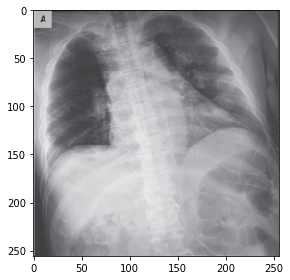

In [15]:
io.imshow(list_image_finding[0].image)

In [16]:
IMG_W = 256
IMG_H = 256
CHANNELS = 1

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 100
BATCH_SIZE = 10

In [17]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [19]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

NameError: name 'DATASET_DIR' is not defined

In [22]:
Counter(i.image.shape for i in list_image_finding)

Counter({(256, 256, 3): 470, (256, 256): 286, (256, 256, 4): 153})

In [23]:
X,y = np.array(
    list(
        skimage.color.rgb2gray(i.image) 
        if len(i.image.shape)>=3 
        else i.image 
        
        for i in list_image_finding)
), np.array(list(i.finding for i in list_image_finding))

<ipython-input-23-2bffb64ded25>:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  skimage.color.rgb2gray(i.image)


In [24]:
del(list_image_finding)

In [25]:
import gc
gc.collect(generation=2)

2794

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X_train = (tf.expand_dims(X_train, axis=-1))
X_test = (tf.expand_dims(X_test, axis=-1))

In [28]:
X_train

<tf.Tensor: shape=(609, 256, 256, 1), dtype=float64, numpy=
array([[[[7.01511041e-01],
         [7.66876360e-01],
         [9.54014074e-01],
         ...,
         [1.25291712e-02],
         [1.56020221e-02],
         [1.56020221e-02]],

        [[9.35489756e-03],
         [9.65045446e-02],
         [4.41344607e-01],
         ...,
         [1.17647059e-02],
         [1.17647059e-02],
         [1.15524292e-02]],

        [[2.69898970e-03],
         [6.13355694e-03],
         [1.73257365e-02],
         ...,
         [1.17647059e-02],
         [1.17647059e-02],
         [8.82499545e-03]],

        ...,

        [[3.43872549e-01],
         [4.00998972e-01],
         [3.98583356e-01],
         ...,
         [1.29771752e-01],
         [1.24762561e-01],
         [9.01701684e-02]],

        [[3.41344975e-01],
         [4.00031744e-01],
         [3.98965993e-01],
         ...,
         [1.33130930e-01],
         [1.27089886e-01],
         [9.80490591e-02]],

        [[3.45182292e-01],
         

In [29]:
tf.config.run_functions_eagerly(True)

In [30]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [31]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [34]:
hystory = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/100
61/61 [==============================] - 41s 676ms/step - loss: 0.7072 - accuracy: 0.5846
Epoch 2/100
61/61 [==============================] - 45s 743ms/step - loss: 0.6977 - accuracy: 0.5846
Epoch 3/100
61/61 [==============================] - 45s 743ms/step - loss: 0.7139 - accuracy: 0.5895
Epoch 4/100
61/61 [==============================] - 46s 752ms/step - loss: 0.7410 - accuracy: 0.5895
Epoch 5/100
61/61 [==============================] - 40s 647ms/step - loss: 0.6724 - accuracy: 0.5878
Epoch 6/100
61/61 [==============================] - 39s 642ms/step - loss: 0.7301 - accuracy: 0.5944
Epoch 7/100
61/61 [==============================] - 39s 640ms/step - loss: 0.6638 - accuracy: 0.5813
Epoch 8/100
61/61 [==============================] - 39s 639ms/step - loss: 0.6855 - accuracy: 0.5862
Epoch 9/100
61/61 [==============================] - 39s 640ms/step - loss: 0.6913 - accuracy: 0.6108
Epoch 10/100
61/61 [==============================] - 39s 639ms/step - loss: 0.661

KeyboardInterrupt: 

In [38]:
pred = model.predict(X_test)
pred

C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


array([[9.9999964e-01],
       [9.9852455e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.4397668e-10],
       [7.2975433e-01],
       [8.9902329e-01],
       [9.9845260e-01],
       [2.8630384e-23],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.5608942e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9267465e-01],
       [9.9622273e-01],
       [1.0000000e+00],
       [9.9982285e-01],
       [9.9915731e-01],
       [9.9978399e-01],
       [5.2971364e-25],
       [1.0000000e+00],
       [9.9999166e-01],
       [9.9967682e-01],
       [3.4894620e-05],
       [6.9348127e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9962425e-01],
       [1.0000000e+00],
       [9.9998033e-01],
       [1.0000000e+00],
       [8.1934386e-01],
       [2.8452277e-02],
       [9.5468783e-01],
       [5.8071393e-01],
       [9.9824202e-01],
       [9.9993014e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.000000

In [39]:
y_test

array([ True,  True,  True, False, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True, False, False, False, False,  True,  True, False,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,

In [41]:
pred_boolean = [i[0]>=0.5 for i in pred]
pred_boolean

[True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_boolean))

              precision    recall  f1-score   support

       False       0.64      0.43      0.51       107
        True       0.73      0.87      0.79       193

    accuracy                           0.71       300
   macro avg       0.69      0.65      0.65       300
weighted avg       0.70      0.71      0.69       300

